In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Task1

빈 칸을 채워주세요!

단계별 output이 github 파일에는 남아있으니 그 output과 동일한 형태인지 확인하면서 진행해주시면 됩니다~

**정수 임베딩**

*   일반적으로 단어 등장 빈도수를 기준으로 정렬한 뒤에 부여
*   단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여



In [2]:
#1. 생성할 문장 데이터

sentence = ("Brick walls are there for a reason and you must not think "
            "that the brick walls aren't there to keep us out, but rather "
            "in this way that the brick walls are there to show us how badly we want things.")

*   python에서 list(set(a))는 실행할 때마다 바뀐다고 함
*   그래서 이 아래로 output이 쭉 달라짐
* https://stackoverflow.com/questions/37037885/does-python-listseta-change-its-order-every-time

In [3]:
list(set(sentence))

['p',
 't',
 'm',
 "'",
 'o',
 'r',
 'u',
 '.',
 'g',
 'e',
 'l',
 'a',
 'y',
 'b',
 'k',
 's',
 ' ',
 'd',
 'n',
 'h',
 'f',
 'w',
 'c',
 'i',
 'B',
 ',']

In [4]:
#2. 문자 집합 만들기
world_set = list(set(sentence))   # 중복을 제거한 문자 집합 생성

## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = {c: i for i, c in enumerate(world_set)}   #인덱스와 원소로 이루어진 튜플(tuple)을 생

In [5]:
print(vocab)

{'p': 0, 't': 1, 'm': 2, "'": 3, 'o': 4, 'r': 5, 'u': 6, '.': 7, 'g': 8, 'e': 9, 'l': 10, 'a': 11, 'y': 12, 'b': 13, 'k': 14, 's': 15, ' ': 16, 'd': 17, 'n': 18, 'h': 19, 'f': 20, 'w': 21, 'c': 22, 'i': 23, 'B': 24, ',': 25}


In [6]:
#3. 문자 집합 크기 확인

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 26


In [8]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인!
sequence_length = 15  # 너무 길거나 너무 짧게 잡으면 안됩니다!    #입력 텐서의 시퀀스 길이. 문장의 길이.
learning_rate = 0.005

##lr 0.3, 0.01, 0.001로 돌려봄

In [9]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce
#한 칸씩 밀면서 다음 단어를 예측함
for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]    ##[##]
  y_str = sentence[i + 1: i + sequence_length + 1]  ##[##]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 Brick walls are -> rick walls are 
1 rick walls are  -> ick walls are t
2 ick walls are t -> ck walls are th
3 ck walls are th -> k walls are the
4 k walls are the ->  walls are ther
5  walls are ther -> walls are there
6 walls are there -> alls are there 
7 alls are there  -> lls are there f
8 lls are there f -> ls are there fo
9 ls are there fo -> s are there for
10 s are there for ->  are there for 
11  are there for  -> are there for a
12 are there for a -> re there for a 
13 re there for a  -> e there for a r
14 e there for a r ->  there for a re
15  there for a re -> there for a rea
16 there for a rea -> here for a reas
17 here for a reas -> ere for a reaso
18 ere for a reaso -> re for a reason
19 re for a reason -> e for a reason 
20 e for a reason  ->  for a reason a
21  for a reason a -> for a reason an
22 for a reason an -> or a reason and
23 or a reason and -> r a reason and 
24 r a reason and  ->  a reason and y
25  a reason and y -> a reason and yo
26 a reason and yo -> 

In [11]:
#데이터가 각 단어의 인덱스로 저장됨
x_data

[[24, 5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9],
 [5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16],
 [23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16, 1],
 [22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16, 1, 19],
 [14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16, 1, 19, 9],
 [16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16, 1, 19, 9, 5],
 [21, 11, 10, 10, 15, 16, 11, 5, 9, 16, 1, 19, 9, 5, 9],
 [11, 10, 10, 15, 16, 11, 5, 9, 16, 1, 19, 9, 5, 9, 16],
 [10, 10, 15, 16, 11, 5, 9, 16, 1, 19, 9, 5, 9, 16, 20],
 [10, 15, 16, 11, 5, 9, 16, 1, 19, 9, 5, 9, 16, 20, 4],
 [15, 16, 11, 5, 9, 16, 1, 19, 9, 5, 9, 16, 20, 4, 5],
 [16, 11, 5, 9, 16, 1, 19, 9, 5, 9, 16, 20, 4, 5, 16],
 [11, 5, 9, 16, 1, 19, 9, 5, 9, 16, 20, 4, 5, 16, 11],
 [5, 9, 16, 1, 19, 9, 5, 9, 16, 20, 4, 5, 16, 11, 16],
 [9, 16, 1, 19, 9, 5, 9, 16, 20, 4, 5, 16, 11, 16, 5],
 [16, 1, 19, 9, 5, 9, 16, 20, 4, 5, 16, 11, 16, 5, 9],
 [1, 19, 9, 5, 9, 16, 20, 4, 5, 16, 11, 16, 5, 9, 11],
 [19, 9, 5, 9, 16, 20, 4, 5, 16

In [13]:
# 한 시퀀스만 출력해서 한 칸씩 쉬프트된 것 확인하기!

print(x_data[0])
print(y_data[0])

[24, 5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9]
[5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11, 5, 9, 16]


**Numpy로 원-핫 인코딩 하기**

*   https://zephyrus1111.tistory.com/457
*   범주가 0부터 시작하는 숫자로 되어있는 경우 Numpy의 eye 함수를 이용하여 원-핫 인코딩을 할 수 있음
*   eye 함수는 숫자를 인자로 받고, 해당 숫자(아래 코드에서는 vocab_size인 26)만큼의 행을 갖는 단위행렬을 생성함
*   범주에 대응하는 원소만 1로 인코딩


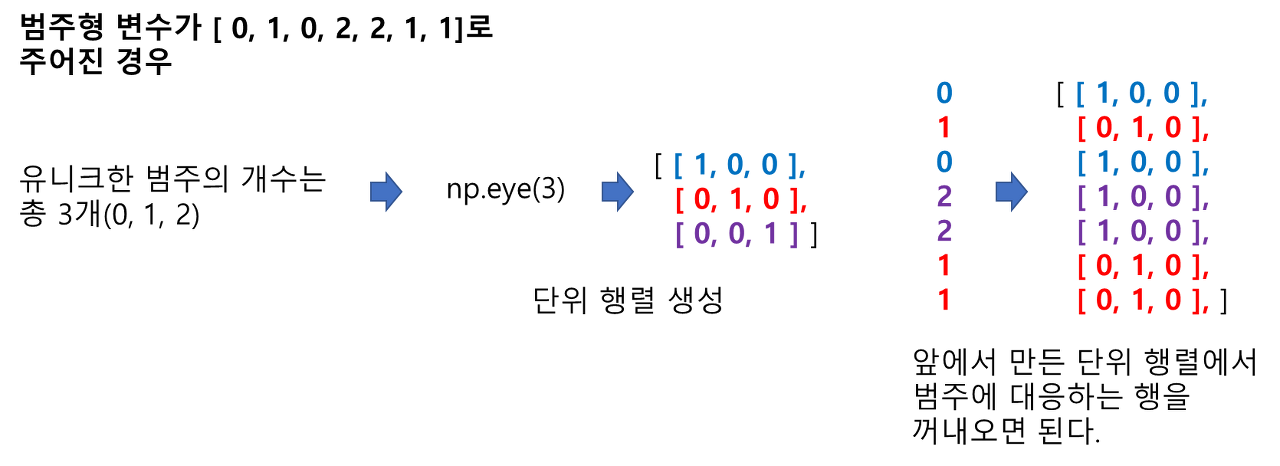


In [18]:
type(x_data)

list

In [20]:
#신경망에 리스트 타입을 넣을 수 없으므로 텐서로 바꿈
##리스트를 텐서로 바꾸는 방법 2가지
#1. 같은 길이가 되도록 리스트에 패딩 추가. (samples, sequence_length) 크기의 정수 텐서로 변환 -> 정수 텐서를 다룰 층을 신경망의 첫번째 층으로 사용(Embedding layer)
#2. 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환. [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000차원의 벡터로 각각 변환 -> 부동 소수 벡터 데이터를 다룰 Dense 층을 신경망의 첫번째 층으로 사용
##이번 코드에서는 2번째 방법 사용

In [23]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행
## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]   #[##]

x_one_hot[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

In [28]:
torch.FloatTensor(x_one_hot)[0]   #부동소수형

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0.,

In [27]:
torch.LongTensor(x_one_hot)[0]    #정수형

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0],
        [0, 0, 0, 0, 0, 0, 0, 

In [32]:
torch.FloatTensor(y_data)[0]

tensor([ 5., 23., 22., 14., 16., 21., 11., 10., 10., 15., 16., 11.,  5.,  9.,
        16.])

In [43]:
torch.LongTensor(y_data)
##둘 다 LongTensor로 하면 안되나?  -> X도 LongTensor로 해보니까 outputs = net(X) 부분에서 에러 뜸
# ValueError: input must have the type torch.float32, got type torch.int64
#backpropagation할 때 gradient를 계산하려면 부동소수점 형식이 더 처리하기 쉬으므로 파이토치의 신경망 모델은 일반적으로 부동소수점(float) 형식의 텐서를 입력으로 기대함

tensor([[ 5, 23, 22,  ...,  5,  9, 16],
        [23, 22, 14,  ...,  9, 16,  1],
        [22, 14, 16,  ..., 16,  1, 19],
        ...,
        [12, 16, 21,  ..., 23, 18,  8],
        [16, 21,  9,  ..., 18,  8, 15],
        [21,  9, 16,  ...,  8, 15,  7]])

In [44]:
##7. 입력 데이터, 레이블 데이터 텐서로 변환
## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTensor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot)
#X = torch.LongTensor(x_one_hot)
Y = torch.LongTensor(y_data)

**텐서의 타입과 크기**


*   torch.Tensor()의 기본 텐서 타입은 FloatTensor임
*   32비트의 부동 소수점은 torch.FloatTensor를, 64비트의 부호 있는 정수는 torch.LongTensor를 사용



In [45]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([183, 15, 26])
레이블의 크기 : torch.Size([183, 15])


In [46]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0.,

In [47]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([ 5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11,  5,  9, 16])


In [39]:
##11. RNN 모델 구현

##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
### batch_fisrt 설정 필요할까? (유튜브 강의 참고)

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):    # 현재 hidden_size는 dic_size와 같음
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)   ##)RNN 셀1
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)   ##) 출력층

  def forward(self, x):   #RNN 셀과 출력층을 연결
    x, _status = self.rnn(x)    ##
    x = self.fc(x)    ##
    return x

In [49]:
vocab_size

26

In [50]:
net = Net(vocab_size, hidden_size, 2)   #RNN layer 수를 2개로 설정
# input_dim 매개변수 : 입력 데이터의 차원. vocab_size인 26으로 맞춰줌(위에서 format(X.shape)으로 확인한 값)
# hidden_dim : 은닉 상태의 차원. hidden_size와 vocab_size 모두 26.
## input_dim과 hidden_dim이 같아야 하는 이유 : 이전 타임 스텝의 출력(은닉 상태)을 현재 타임 스텝의 입력으로 사용하므로

In [51]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [52]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([183, 15, 26])


In [55]:
outputs[0]

tensor([[ 2.6547e-02, -2.1440e-01,  1.1972e-01, -1.3411e-01,  2.5007e-01,
          2.6759e-01,  1.2747e-01, -1.8045e-01, -1.5601e-01, -9.6848e-02,
          3.2490e-01, -1.3813e-01, -1.5071e-02,  3.0859e-03, -2.7754e-02,
         -1.3734e-01, -5.0020e-03, -4.5527e-02, -5.4868e-03, -2.2001e-02,
          1.0394e-01,  8.7110e-02, -5.7183e-03,  2.1335e-01, -5.3445e-02,
         -6.5541e-02],
        [ 7.4137e-02, -2.5213e-01,  2.1089e-01, -9.4185e-02,  1.9634e-01,
          1.4981e-01,  5.2472e-02, -1.9852e-01, -1.8421e-01, -2.0367e-01,
          2.3536e-01, -6.4533e-02, -5.7774e-02,  3.5794e-02, -1.0649e-01,
         -1.7275e-01,  6.1729e-03, -4.8610e-02, -2.5737e-02,  4.7755e-02,
          2.1676e-01,  6.8056e-02,  5.7162e-02,  2.4966e-01,  2.8389e-04,
          3.5252e-03],
        [ 2.6333e-02, -2.7838e-01,  2.1320e-01, -1.7871e-01,  1.8204e-01,
          1.7893e-01,  5.7391e-02, -2.4553e-01, -1.0397e-01, -1.9443e-01,
          1.7530e-01, -1.6858e-02, -4.0378e-02, -8.7101e-02, -8.06

In [56]:
Y[0]

tensor([ 5, 23, 22, 14, 16, 21, 11, 10, 10, 15, 16, 11,  5,  9, 16])

In [59]:
Y.view(-1)[0]

tensor(5)

In [61]:
##15. Training 시작

for i in range(200):    #에포크 수 100이 아니라 200으로 늘림
    optimizer.zero_grad()   #매 반복마다 gradient 초기
    outputs = net(X)    #각 시퀀스에 대한 예측값
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    #RNN 모델의 출력은 (배치 크기, 시퀀스 길이, 출력 차원)의 형태이며 Y는 (배치 크기, 시퀀스 길이)의 형태이므로 직접 비교할 수 없음
    #outputs.view(-1, vocab_size) -> -1은 해당 차원의 크기를 자동으로 계산하여 남은 차원을 채우도록 하고, 출력값의 형태는 배치 크기x시퀀스 길이로 변한
    #Y.view(-1) -> Y의 형태를 1차원으로 펼쳐 실제 클래스 레이블을 단일 벡터로 표현함
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()    #가중치 업데이트

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)     #outputs 중 가장 큰 확률값을 가진 인덱스를 선택하여 예측값을 계산. dim=2는 시퀀스 길이에 해당하는 차원을 기준으로 최댓값 선택
    predict_str = ""       #예측된 문자열을 저장할 빈 문자열
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기 <- 그 이유? 첫 번째 시퀀스에 대해서는 이전 타임 스텝의 예측값이 없으므로 전체 예측값을 사용하여 문자열을 생성해줌
            predict_str += ''.join([world_set[t] for t in result])    #예측된 클래스의 인덱스를 world_set에서 해당하는 문자로 변환하여 문자열에 추가
        else: # 그 다음에는 마지막 글자만 반복 추가 <- 첫번째 이후부터 이전 타임 스텝에서의 예측값을 사용하여 문자열을 생성하므로, 예측한 전체 값을 저장하는 것이 아니라 예측값 중 마지막 문자만을 추가
            predict_str += world_set[result[-1]]    #이렇게 한 단어씩 추가하는 방식으로 시퀀스를 연결하여 최종적으로 생성된 예측된 문자열을 반환

    print(predict_str)

liiifflmfililmffimflififlfmfiffffffmfffffifiififififimmfiiimmffimffiiiifflmfililmffiiiimflififfiiiiiifiiififiiffilfmflfiffimflilmffimmffimffiiiifflmfililmffimflififflmfififiifffiffffiiifimffiimmfil
lmfmf  m mlm  ff mmlff flfmf fl fffmffffffffif f fif mmfff mm f mmf  fmf  m mlm  fffim mmlff fffmrfflmmfffmr f f m mfof ff mmlm mff mm f mmf  fmf  m mlm  ff mmlff fflmfffmfmmfff m fff mf    m mmffr
r                      r                                                                                                                                               f                             
r                                                                                                                                                                                                    
r                                                                                                                                                                                                    
          

In [62]:
#lr 0.005일 때의 결과
predict_str

"rick walls are there tor a reason and you must not think that the brick walls are 't there to keep us out, but rather in this way that the brick walls are there to show us how badly we want things."

In [ ]:
#lr 0.001일 때의 결과
#predict_str

'            h  th     h                                   h  h h               h      h     h                             h        h                    h  th     h          h                 h     '

결과가 어떤가요?? 마지막 에폭의 문장이 그럴싸한가요?

In [60]:
#"Brick walls are there for a reason and you must not think that the brick walls aren't there to keep us out, but rather in this way that the brick walls are there to show us how badly we want things."
## 두글자 틀림. 전반적으로 첫번째 글자 'b'가 인식이 잘 안됨. 한칸씩 밀려서 학습하는 만큼 2번째 글자부터는 여러번 학습되는데 첫번째 글자는 한번만 입력되기 때문인 듯
## for를 tor로 예측한 이유는 문장 전체에 t가 가장 많이 등장하기 때문에 애매한 단어는 t로 예측하는 게 가장 loss가 적기 때문일 것으로 추측

## Task2

위 sentence는 제가 임의로 생성한 문장들입니다.

마음에 드시는 문구 가져오셔서 문장이 어떻게 생성되는지 확인해보세요!

영어가 아닌 한국어로 시도해보는 것도 좋겠죠?

수정이 많이 필요(토큰화 등) 할 수 있으나 한번 시도해보시는 것 권장드립니다 :)

위 베이스라인은 어디든 수정하셔도 좋고 조금 더 자연스러운 문장이 나올 수 있게 다양한 시도를 해보세요!

조건 : 문장 3개 이상, 연결성이 있는 문장을 " " 으로 구분하여 ( )에 넣기

In [63]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [64]:
#1. 생성할 문장 데이터

sentence = (" 그러므로 "
            "너무나 많은 여름이. "
            "너무나 많은 골목길과 너무나 많은 산책과 너무나 "
            "많은 저녁이 우리를 찾아오리라. "
            "우리는 사랑할 수 있으리라. 우리는 "
            "좋아하는 것을 더 좋아할 수 있으리라.")

In [66]:
#2. 문자 집합 만들기
world_set = list(set(sentence))   # 중복을 제거한 문자 집합 생성

## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = {c: i for i, c in enumerate(world_set)}   #인덱스와 원소로 이루어진 튜플(tuple)을 생성

In [67]:
print(vocab)

{'있': 0, '수': 1, '저': 2, '아': 3, '오': 4, '를': 5, '과': 6, '.': 7, '많': 8, '는': 9, '좋': 10, '그': 11, '녁': 12, '더': 13, '나': 14, '할': 15, '무': 16, '름': 17, '므': 18, '이': 19, '너': 20, ' ': 21, '목': 22, '랑': 23, '리': 24, '을': 25, '라': 26, '하': 27, '것': 28, '사': 29, '으': 30, '골': 31, '길': 32, '은': 33, '찾': 34, '책': 35, '우': 36, '산': 37, '여': 38, '로': 39, '러': 40}


In [68]:
#3. 문자 집합 크기 확인

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 41


In [69]:
# hidden_size = vocab_size # 같아야 하는 것 확인!
# sequence_length = 4  # 너무 길거나 너무 짧게 잡으면 안됩니다!    #입력 텐서의 시퀀스 길이. 문장의 길이.
# learning_rate = 0.03

# x_data = []
# y_data = []

# for i in range(0, len(sentence) - sequence_length):
#   x_str = sentence[i:i + sequence_length]
#   y_str = sentence[i + 1: i + sequence_length + 1]
#   #print(i, x_str, "->", y_str)

#   # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
#   x_data.append([vocab[c] for c in x_str])
#   y_data.append([vocab[d] for d in y_str])

# ## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
# x_one_hot = [np.eye(vocab_size)[x] for x in x_data]   #[##]

# ## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
# X = torch.FloatTensor(x_one_hot)
# Y = torch.LongTensor(y_data)

# ##11. RNN 모델 구현

# ##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
# ### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
# ### batch_fisrt 설정 필요할까? (유튜브 강의 참고)

# class Net(torch.nn.Module):
#   def __init__(self, input_dim, hidden_dim, layers):    # 현재 hidden_size는 dic_size와 같음
#     super(Net, self).__init__()
#     self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)   ##)RNN 셀1
#     self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)   ##) 출력층

#   def forward(self, x):   #RNN 셀과 출력층을 연결
#     x, _status = self.rnn(x)    ##
#     x = self.fc(x)    ##
#     return x

# net = Net(vocab_size, hidden_size, 2)

# ##12. loss function
# criterion = torch.nn.CrossEntropyLoss()

# ##13. optimizer
# optimizer = optim.Adam(net.parameters(), learning_rate)

# for i in range(500):
#     optimizer.zero_grad()
#     outputs = net(X)
#     loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
#     loss.backward()
#     optimizer.step()

#     #16. 예측결과 확인
#     results = outputs.argmax(dim=2)
#     predict_str = ""
#     for j, result in enumerate(results):
#         if j == 0: # 처음에는 예측 결과를 전부 가져오기
#             predict_str += ''.join([world_set[t] for t in result])
#         else: # 그 다음에는 마지막 글자만 반복 추가
#             predict_str += world_set[result[-1]]

#     print(predict_str)

# #최종결과
# predict_str

In [70]:
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):    # 현재 hidden_size는 dic_size와 같음
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)   ##)RNN 셀1
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)   ##) 출력층

  def forward(self, x):   #RNN 셀과 출력층을 연결
    x, _status = self.rnn(x)    ##
    x = self.fc(x)    ##
    return x

In [71]:
def train(seq_len):
  hidden_size = vocab_size # 같아야 하는 것 확인!
  sequence_length = seq_len  # 너무 길거나 너무 짧게 잡으면 안됩니다!    #입력 텐서의 시퀀스 길이. 문장의 길이.
  learning_rate = 0.01

  x_data = []
  y_data = []

  for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    #print(i, x_str, "->", y_str)

    if i == 0:
      for _ in range(4):
        x_data.append([vocab[c] for c in x_str])
        y_data.append([vocab[d] for d in y_str])
    else:
      x_data.append([vocab[c] for c in x_str])
      y_data.append([vocab[d] for d in y_str])

  x_one_hot = [np.eye(vocab_size)[x] for x in x_data]   #[##]

  X = torch.FloatTensor(x_one_hot)
  Y = torch.LongTensor(y_data)
  net = Net(vocab_size, hidden_size, 2)

  criterion = torch.nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), learning_rate)

  #losses = []
  for i in range(400):
      optimizer.zero_grad()
      outputs = net(X)
      loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
      loss.backward()
      optimizer.step()

      results = outputs.argmax(dim=2)
      predict_str = ""
      for j, result in enumerate(results):
          if j == 0: # 처음에는 예측 결과를 전부 가져오기
              predict_str += ''.join([world_set[t] for t in result])
          else: # 그 다음에는 마지막 글자만 반복 추가
              predict_str += world_set[result[-1]]

  return predict_str

In [72]:
for seq_len in [4, 8, 12, 16, 20, 24]:
  print(seq_len, train(seq_len))

4 많러므로로로로 너무나 많은 저름이. 너무나 많은 저목길과 너무나 많은 저책과 너무나 많은 저녁이 우리를 찾아오리라. 우리는 좋랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.
8 너러므로 너무나나나나 많은 여름이. 너무나 많은 여목길과 너무나 많은 여책과 너무나 많은 여녁이 우리를 찾아오리라. 우리는 좋랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.
12 그러므로 너무나 많은    여름이. 너무나 많은 골목길과 너무나 많은 산책과 너무나 많은 저녁이 우리를 찾아오리라. 우리는 사랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.
16 그러므로 너무나 많은 여름이.... 너무나 많은 골목길과 너무나 많은 산책과 너무나 많은 저녁이 우리를 찾아오리라. 우리는 사랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.
20 너러므로 너무나 많은 여름이. 너무나나나나 많은 골목길과 너무나 많은 산책과 너무나 많은 저녁이 우리를 찾아오리라. 우리는 사랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.
24 그러므로 너무나 많은 여름이. 너무나 많은    골목길과 너무나 많은 산책과 너무나 많은 저녁이 우리를 찾아오리라. 우리는 사랑할 수 있으리라. 우리는 좋아하는 것을 더 좋아할 수 있으리라.


**적절한 lr 값 찾기**



*   0.01로 loss 그래프 그리니까 너무 팍 꺾여서 0.05로 설정함



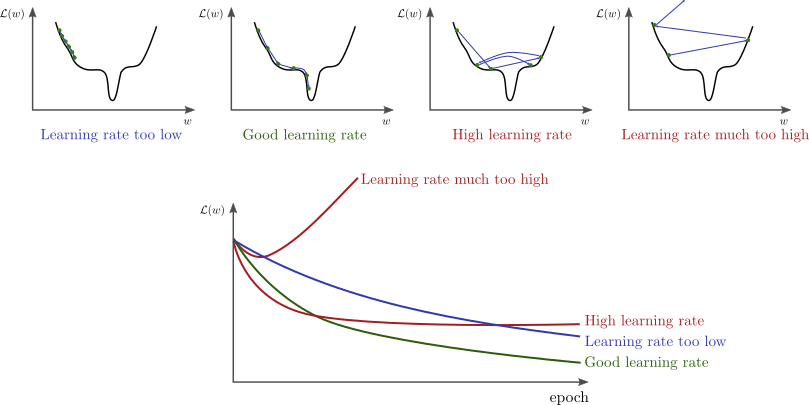

In [73]:
##시퀀스 길이에 따른 loss 그래프

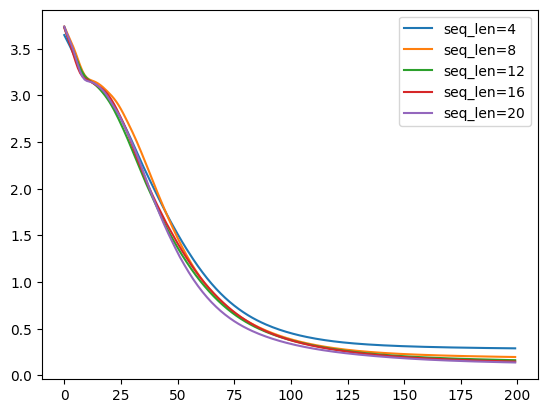

In [ ]:
# import matplotlib.pyplot as plt

# for seq_len in [4, 8, 12, 16, 20]:
#   losses = train(seq_len)
#   plt.plot(range(200), losses, label=f"seq_len={seq_len}")
# plt.legend()
# plt.show()

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure()
# for seq_len in [4, 8, 12, 16, 20, 24]:
#   fig.add_trace(go.Scatter(x=list(range(200)), y=train(seq_len), name=f"seq_len={seq_len}"))
# fig.show()